In [14]:
import pandas as pd
from src.config_file import PATH
import yaml

# Load data
Water level data from [https://www.moezala.gov.mm/](https://www.moezala.gov.mm/) based on forecast.

Confirmed with news sources.

In [2]:
from script.plot_water import plot_water_level
from src.water_classification import classify_water_level

In [3]:
toungoo_df = pd.read_csv("data/Toungoo_Waterlevel.csv", sep=",")
toungoo_df.head()

,Date,Rivers,Stations,Danger level (CM),Water level at (12:30) hr (cm),Water level changes during last (24) hr (cm),Water level forecast at next (24) hrs (cm),Remarks,Day,Water Level Classification
0,2024-09-08,Sittoung,Toungoo,600,564,-11,554,NaN,8,0
1,2024-09-09,Sittoung,Toungoo,600,549,-15,534,NaN,9,0
2,2024-09-10,Sittoung,Toungoo,600,552,3,562,NaN,10,0
3,2024-09-11,Sittoung,Toungoo,600,593,41,638,It may exceeded its above danger level during ...,11,0
4,2024-09-12,Sittoung,Toungoo,600,656,63,716,It may rise about 2 feet during the next 1 day...,12,1


In [4]:
x = 5  # Replace with your desired maximum classification value

min_level = toungoo_df["Water level at (12:30) hr (cm)"].min()
max_level = toungoo_df["Water level at (12:30) hr (cm)"].max()
danger_level = toungoo_df["Danger level (CM)"][0]

In [5]:
toungoo_df["Water Level Classification"] = toungoo_df[
    "Water level at (12:30) hr (cm)"
].apply(classify_water_level, args=(danger_level, max_level, x))

print(f"Min: {min_level}, Max: {max_level}")
print(toungoo_df[["Water level at (12:30) hr (cm)", "Water Level Classification"]])

Min: 527, Max: 805
    Water level at (12:30) hr (cm)  Water Level Classification
0                              564                           0
1                              549                           0
2                              552                           0
3                              593                           0
4                              656                           1
5                              735                           3
6                              805                           5
7                              774                           4
8                              744                           4
9                              726                           3
10                             716                           3
11                             710                           3
12                             700                           2
13                             698                           2
14                             692  

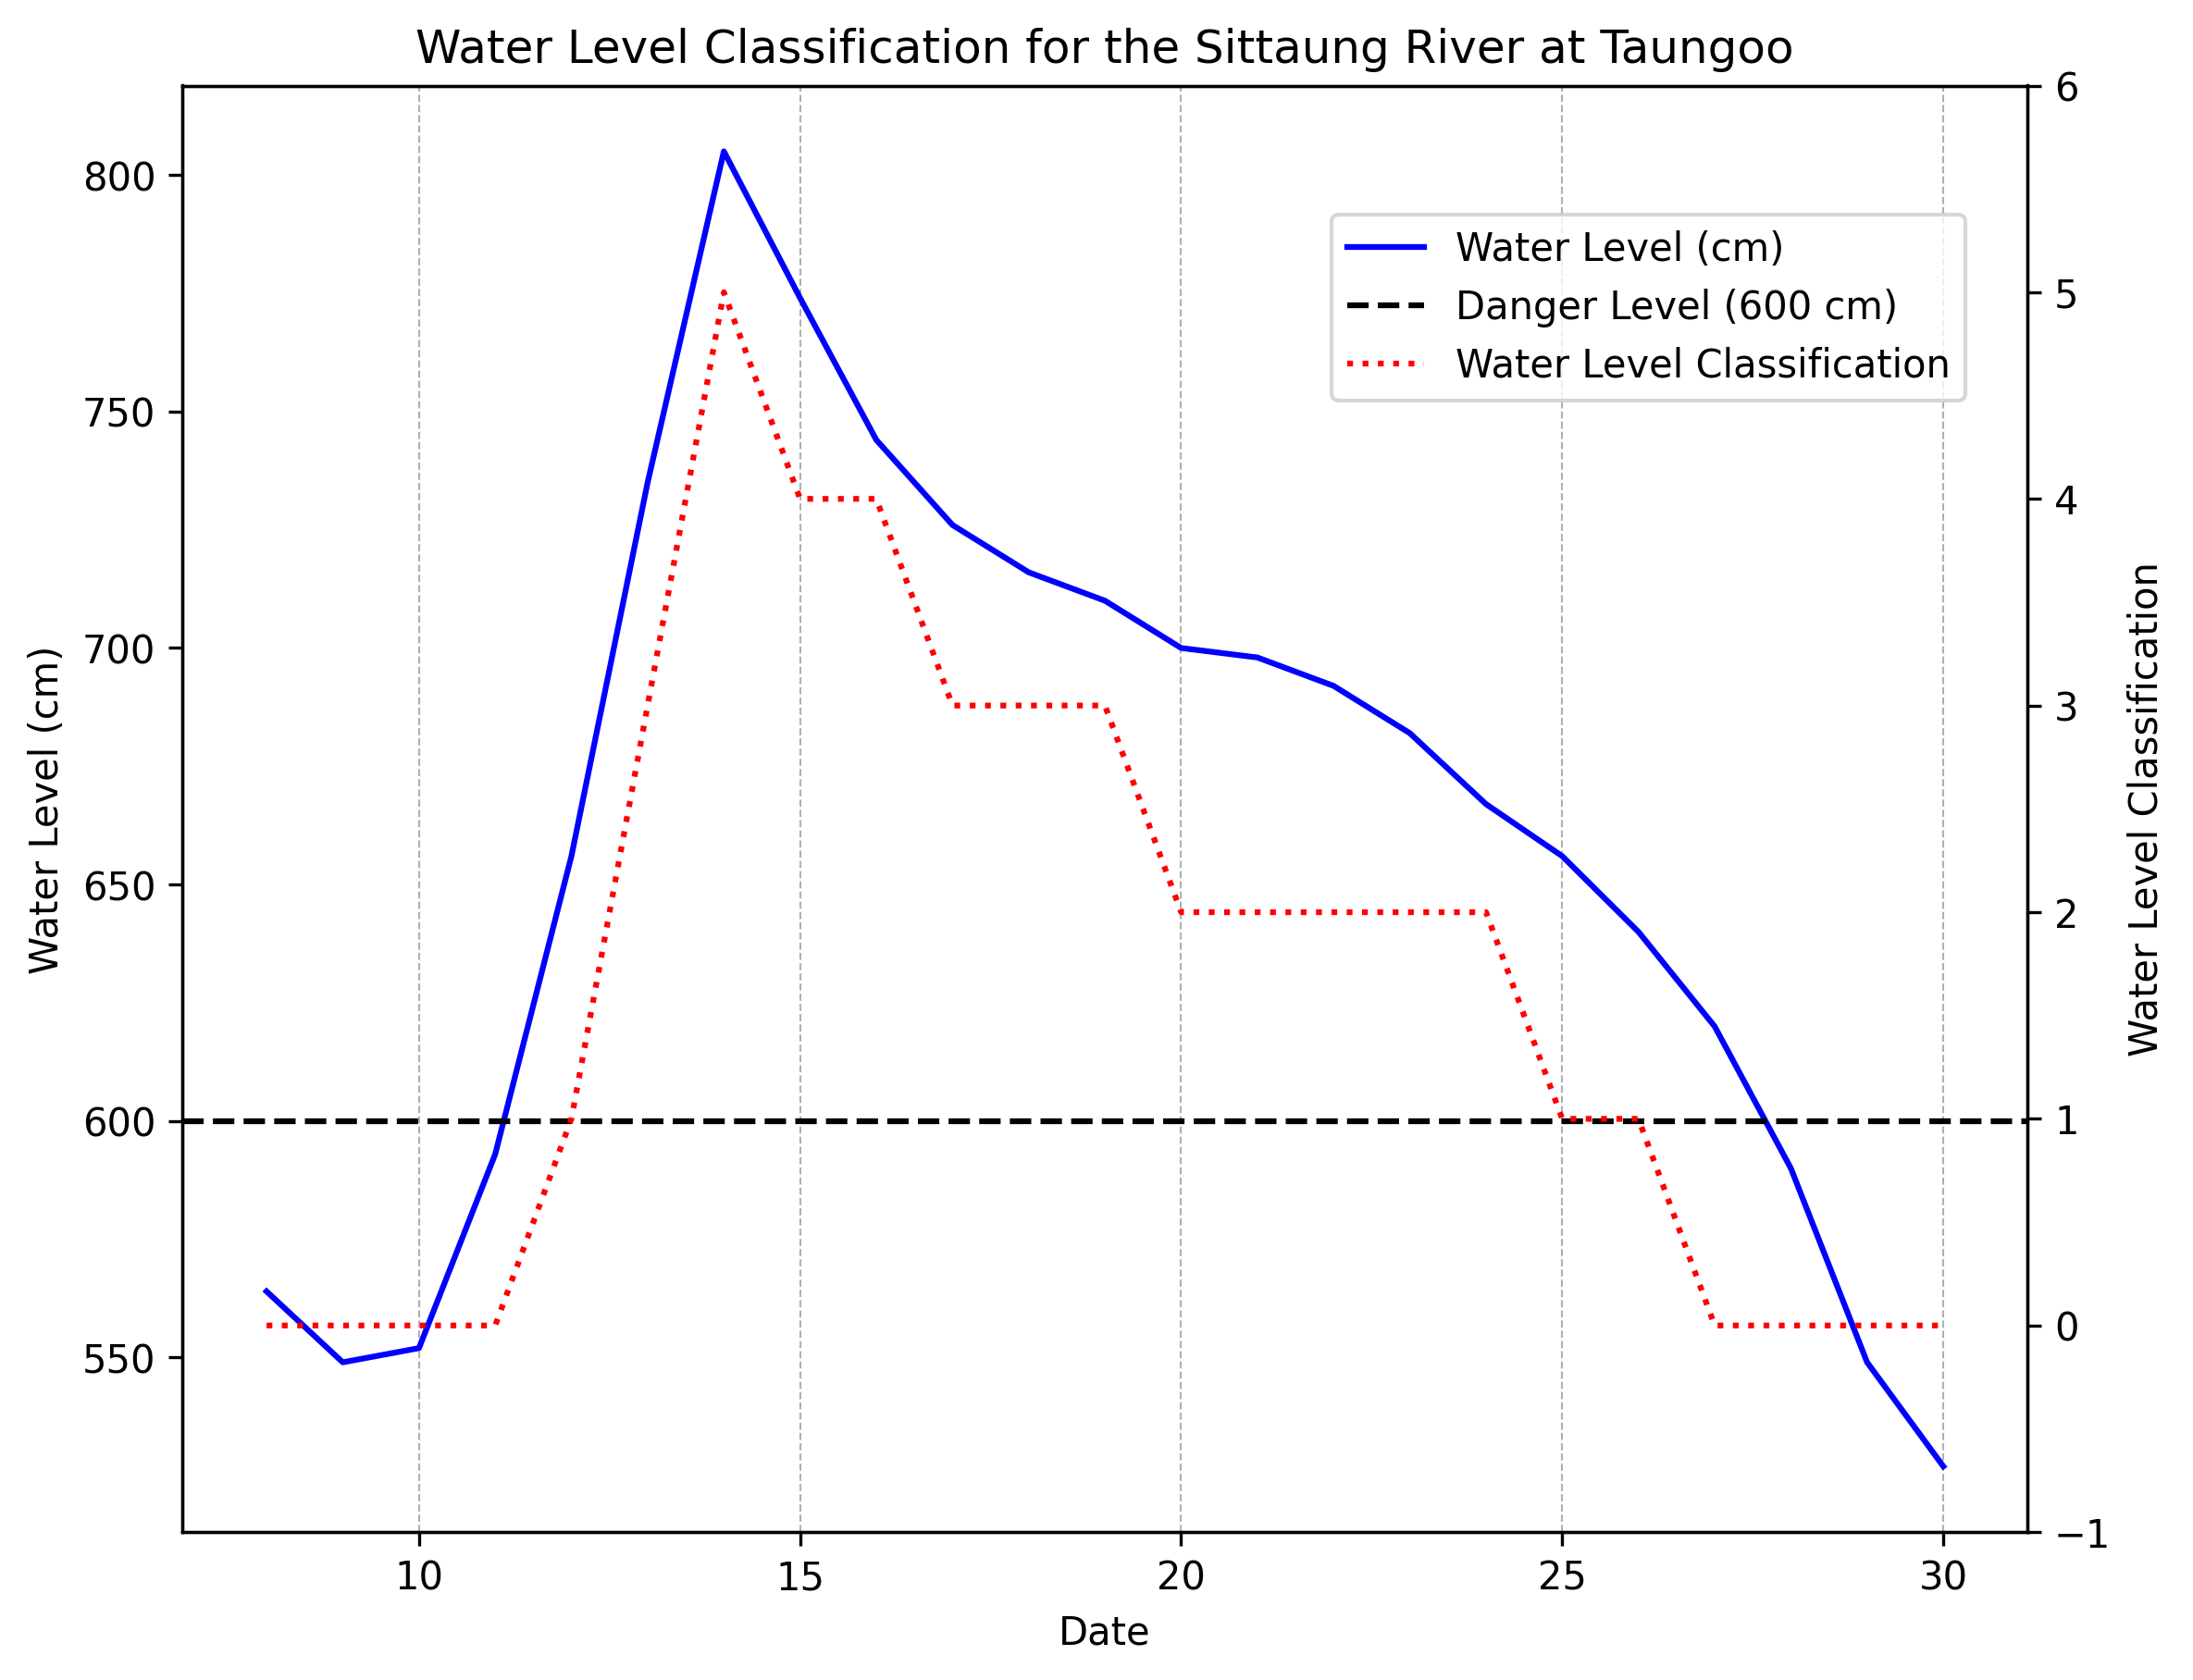

In [6]:
plot_water_level(
    toungoo_df,
    danger_level,
    x,
    title="Water Level Classification for the Sittaung River at Taungoo",
)

# Locations
https://www.google.com/maps/d/u/0/edit?mid=1MmdvhUt0CL0N00Qw0RuPRlaNP8C06Ps&usp=sharing

![locations](results/locations_Toungoo.png)

Temples were chosen based on religious centers identified through Google Maps. Flood zones were selected using maps of inhabited areas, and the same approach was used for towns, ensuring they were not located beside the river. It was assumed that Toungoo was protected from flooding due to its significance. The route connecting these locations was determined using Google Maps directions.

The camps were established in higher elevated areas and large spaces, such as the university. Due to the available infrastructure, multiple camps were set up in the city of Toungoo.

Future research could improve on this map!

# Route visualization

In [7]:
from script.plot_route import create_route_plot

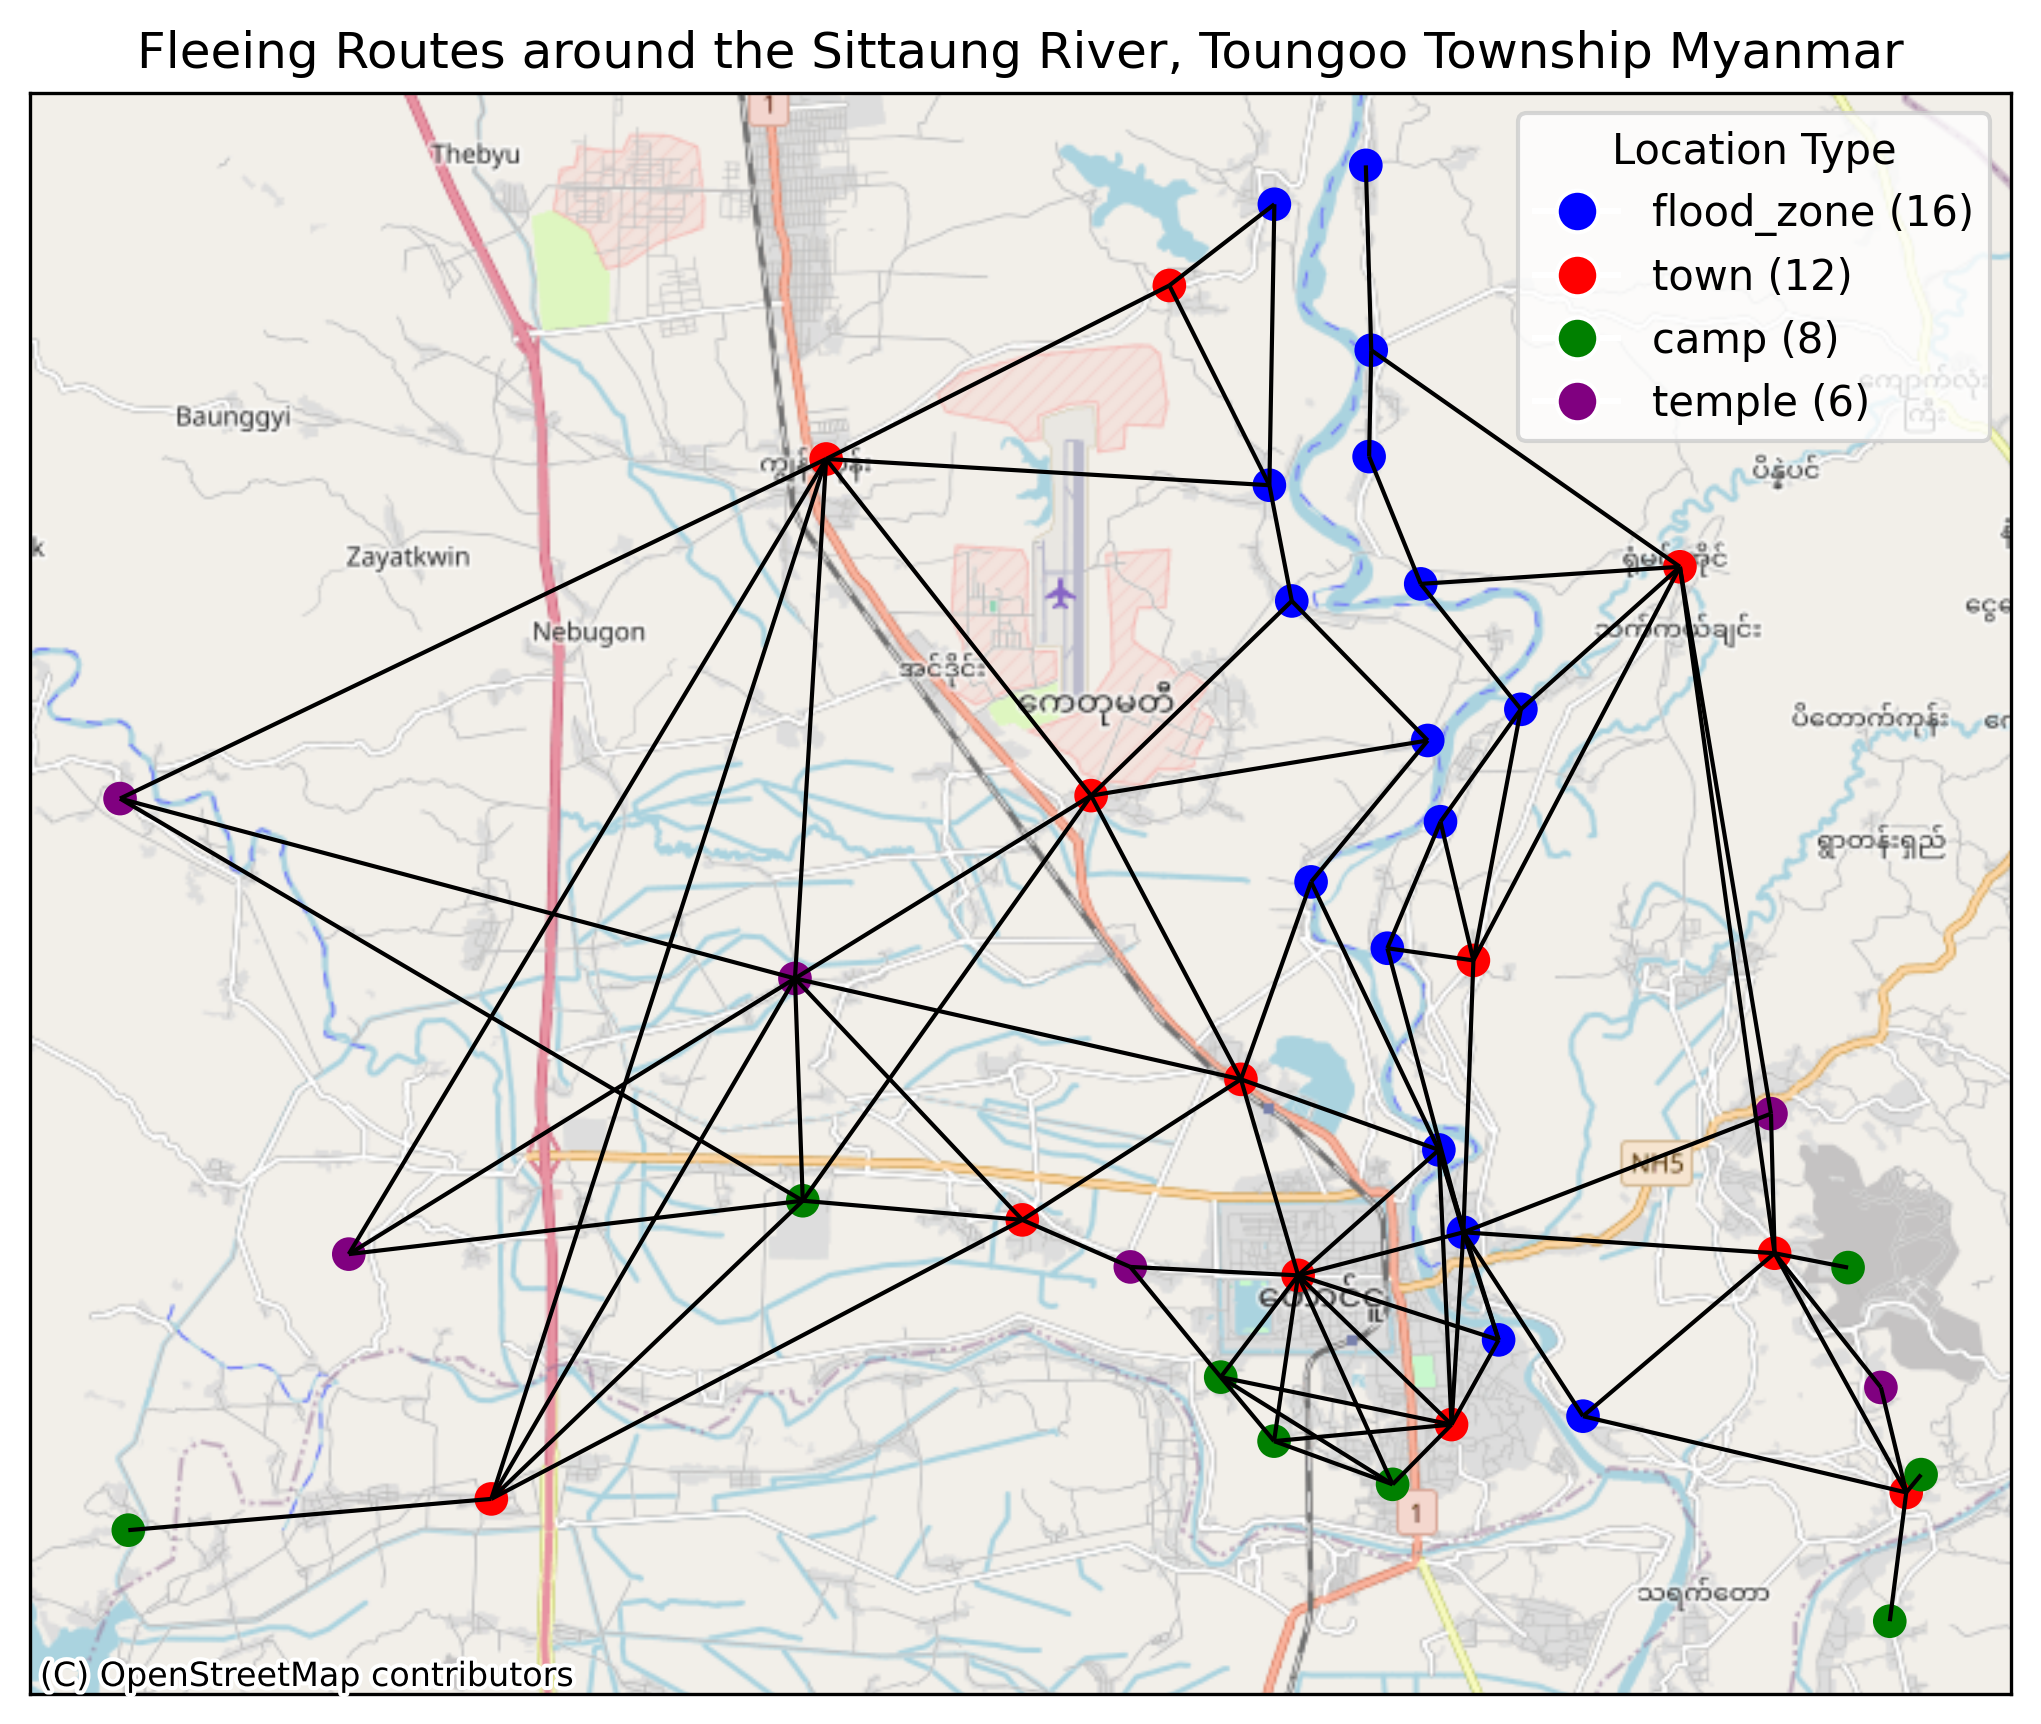

In [8]:
create_route_plot()

# Config files


In [26]:
max_flood_level = x + 1
max_flood_level

6

Simsetting.yml file:
```yml
log_levels:
  agent: 1
  camp: 0
  init: 1
  Flood: 0
  link: 0

# Set to 100 to scale down the population by 100 and increase the execution time.
optimisations:
  hasten: 100

spawn_rules:
  flood_driven_spawning: True
  flood_zone_spawning_only: True
  conflict_zone_spawning_only: False
  take_from_population: True
  flood_driven_spawning:
    flood_spawn_mode: "pop_ratio"
    displaced_per_flood_day: [0.0, 0.1, 0.2, 0.5, 0.7, 0.9]

move_rules:
  max_flood_level: 6
  flood_rules:
    flood_movechances: [0.1, 0.3, 0.4, 0.7, 1.0, 1.0]
    flood_loc_weights: [1.0, 0.7, 0.5, 0.2, 0.0, 0.0]
```

In [ ]:
# Create flood_level.csv
# Create floodawareness.csv